<a href="https://colab.research.google.com/github/Shababhussain1/CNN-Model-for-image-classification/blob/main/CNN_Model_for_classification_of_street_view_housing_numbers_(Adam%2C_Accuracy_93_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN Model for classification of street view housing numberrs**

This project aims to build a Convolutional Neural Network (CNN) to classify images from the SVHN dataset. The dataset contains 99289 images categorized into 10 classes. CNNs are particularly well-suited for image classification due to their ability to capture spatial hierarchies in images.

**Importing Required Packages**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)


**Loading SVHN dataset**

In [ ]:
def load_data(path):
    """ Helper function for loading a MAT-File"""
    data = loadmat(path)
    return data['X'], data['y']

X_train, y_train = load_data("/content/train_32x32.mat")
X_test, y_test = load_data("/content/test_32x32.mat")

**Displaying the shape of dataset**

In [ ]:
#Printing the shape of training and testing dataset
print("Training_set:", X_train.shape, y_train.shape)
print("Test_set:", X_test.shape, y_test.shape)

Training_set: (32, 32, 3, 73257) (73257, 1)
Test_set: (32, 32, 3, 26032) (26032, 1)


**Reordering the Images Dimensions**

In [ ]:
X_train = X_train.transpose(3, 0, 1, 2)
X_test = X_test.transpose(3, 0, 1, 2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(73257, 32, 32, 3)
(26032, 32, 32, 3)
(73257, 1)
(26032, 1)


# **Min Max Scaling**

In [ ]:
# Converting to floating point and normalizing pixel values in range [0,1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255

**Sample image with label from training dataset**

[9]


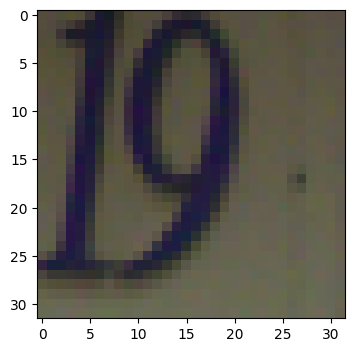

In [ ]:
plt.imshow(X_train[1])
print(y_train[1])

**One Hot Encoding**

In [ ]:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0
# Reshaping Labels in One-hot encoding for Multi-class Classification
from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)  # 10 classes (digits 0-9)
y_test = to_categorical(y_test, 10)

**Updated shapes of the dataset**

In [ ]:
# Seeing updated Shapes
print("X_train Shape :", X_train.shape)
print("y_train Shape :", y_train.shape)
print("X_test Shape :", X_test.shape)
print("y_test Shape :", y_test.shape)

X_train Shape : (73257, 32, 32, 3)
y_train Shape : (73257, 10)
X_test Shape : (26032, 32, 32, 3)
y_test Shape : (26032, 10)


**Required Packages for Building the CNN**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers, models, optimizers, callbacks

# **Building the CNN**

In [ ]:
#Creating model
model = models.Sequential()

#First Convolution Block
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
#second Convolution Block
model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
# Third Convolution Block
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
#fourth Convolution Block
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
# Flatten and Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))  # Increased dense layer units
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))  # Higher dropout for dense layer

model.add(layers.Dense(128, activation='relu'))  # Existing dense layer
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))  # Added dropout

model.add(layers.Dense(10, activation='softmax'))  # Output layer for 10 classes
# Compile the model with Adam optimizer and learning rate scheduler
lr_schedule = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Model Summary**

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 688,458 (2.63 MB)

 Trainable params: 686,730 (2.62 MB)

 Non-trainable params: 1,728 (6.75 KB)

# **Model Training**

In [14]:
CNN_model = model.fit(X_train, y_train, validation_split= 0.2, epochs=10, batch_size=64, verbose=1, callbacks=[lr_schedule])

Epoch 1/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 239s 260ms/step - accuracy: 0.7883 - loss: 0.6682 - val_accuracy: 0.8822 - val_loss: 0.3826 - learning_rate: 0.0010
Epoch 2/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 250s 248ms/step - accuracy: 0.8415 - loss: 0.5093 - val_accuracy: 0.8979 - val_loss: 0.3353 - learning_rate: 0.0010
Epoch 3/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 270s 257ms/step - accuracy: 0.8627 - loss: 0.4406 - val_accuracy: 0.9065 - val_loss: 0.3048 - learning_rate: 0.0010
Epoch 4/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 227s 248ms/step - accuracy: 0.8756 - loss: 0.4059 - val_accuracy: 0.9008 - val_loss: 0.3285 - learning_rate: 0.0010
Epoch 5/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 227s 248ms/step - accuracy: 0.8843 - loss: 0.3800 - val_accuracy: 0.9139 - val_loss: 0.2884 - learning_rate: 0.0010
Epoch 6/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 270s 257ms/step - accuracy: 0.8904 - loss: 0.3598 - val_accuracy: 0.9131 - val_loss: 0.2911 - learning_rate: 0.0010
Epoch 7/20
916/916 ━━━━━━━━━━━━━━━━━━━━ 262s 257ms/step - accura

# **Model Testing**

In [15]:
#Import neccessary libraries for testing
from sklearn.metrics import accuracy_score

#Predicitng the probablities for the test set using the trained model
y_pred_probs = model.predict(X_test, verbose = 0)
y_pred_probs = np.where(y_pred_probs > 0.5, 1, 0)

# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_test, y_pred_probs)
print("\nTest accuracy: {}".format(test_accuracy))


Test accuracy: 0.9266671788567916


In [17]:
history = model.history.history
# Access the training history
training_accuracy = CNN_model.history['accuracy']
validation_accuracy = CNN_model.history['val_accuracy']
training_loss = CNN_model.history['loss']
validation_loss = CNN_model.history['val_loss']

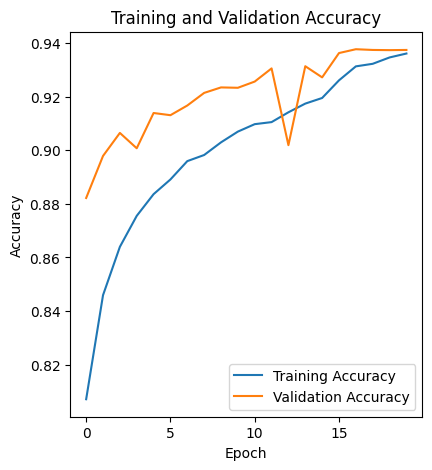

In [18]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

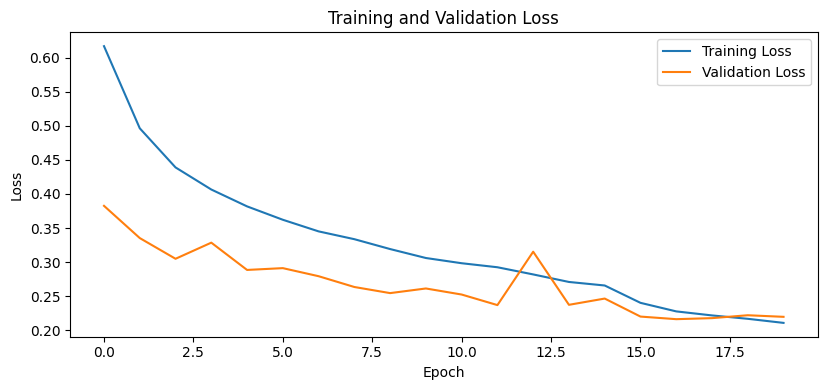

In [19]:
# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()